In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as ss
import warnings
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder
#from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn import metrics

from sklearn.metrics import classification_report

import pickle 

In [3]:
df_car = pd.read_csv('df_car.csv')

C:\Users\ASus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
def access_NA(df_car):
    
    null_sum = df_car.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(df_car.index))*100).round(2) ).sort_values(ascending=False)
    
    
    data_car_na = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    data_car_na = data_car_na[ (data_car_na.T != 0).any() ]
    
    return data_car_na

access_NA(df_car)

,Number of NA,Percent NA


In [5]:
df_car = df_car.drop(['P_ID', 'V_ID', 'C_YEAR'], axis = 1)

In [6]:
cat_data = df_car.select_dtypes(include = ['object', 'category']).columns

In [7]:
cat_data

Index(['C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE',
       'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE'],
      dtype='object')

In [8]:
TE = ce.TargetEncoder(cols = cat_data)
model = TE.fit(df_car, df_car['C_SEV'])

C:\Users\ASus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [9]:
df_car_t = model.transform(df_car)
df_car_t

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,20,0,2,0.012446,0.010090,0.015889,0.020002,0.037848,0.013484,0.024478,1990,0.019940,41,0.015195,0.008339,0.013812,1
1,1,1,20,0,2,0.012446,0.010090,0.015889,0.020002,0.037848,0.013484,0.014462,1987,0.019940,19,0.015195,0.008339,0.013812,1
2,1,1,20,0,2,0.012446,0.010090,0.015889,0.020002,0.037848,0.013484,0.014462,1987,0.012676,20,0.018782,0.011069,0.013812,2
3,1,1,8,0,1,0.031366,0.010090,0.027297,0.018718,0.035336,0.023966,0.014462,1986,0.019940,46,0.015195,0.008339,0.013812,1
4,1,1,8,0,1,0.031366,0.010090,0.027297,0.018718,0.035336,0.023966,0.029604,2000,0.019940,5,0.030524,0.011069,0.013812,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255553,12,7,14,0,2,0.017569,0.027813,0.015889,0.020002,0.013352,0.023966,0.016861,2008,0.019940,44,0.014485,0.008339,0.013812,1
5255554,12,7,14,0,2,0.017569,0.027813,0.015889,0.020002,0.013352,0.023966,0.016861,2008,0.019940,34,0.018323,0.011069,0.013812,2
5255555,12,7,19,0,1,0.040117,0.027813,0.015889,0.018718,0.040510,0.023966,0.014462,2001,0.012676,35,0.014485,0.011069,0.013812,1
5255556,12,7,19,0,1,0.040117,0.027813,0.015889,0.018718,0.040510,0.023966,0.014462,2001,0.019940,26,0.018323,0.008339,0.013812,2


In [10]:
access_NA(df_car_t)

,Number of NA,Percent NA


In [11]:
df_car_t['P_USER'] = df_car_t['P_USER'].fillna((df_car_t['P_USER'].mode()[0]))
df_car_t['P_USER'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [12]:
df_car_t = df_car_t.dropna()

In [13]:
access_NA(df_car_t)

,Number of NA,Percent NA


In [14]:
corr = df_car_t.corr(method = 'spearman')

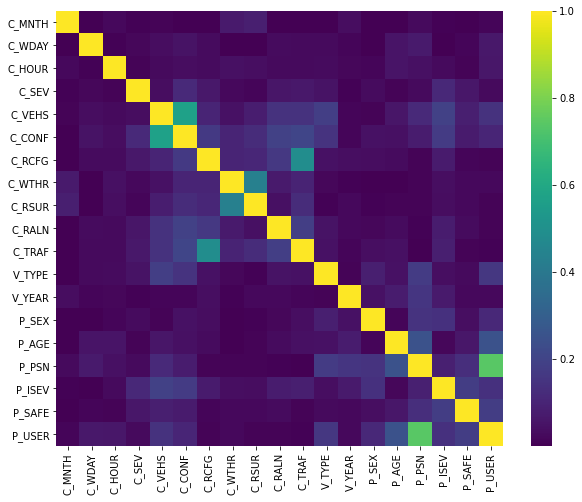

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap = 'viridis')
plt.show()

In [16]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr.correlation > 0.1]

,level_0,level_1,correlation
357,P_USER,P_PSN,0.739235
99,C_CONF,C_VEHS,0.568066
196,C_TRAF,C_RCFG,0.486168
159,C_RSUR,C_WTHR,0.430428
356,P_USER,P_AGE,0.252110
299,P_PSN,P_AGE,0.250801
195,C_TRAF,C_CONF,0.203634
308,P_ISEV,C_VEHS,0.192265
176,C_RALN,C_CONF,0.191684
213,V_TYPE,C_VEHS,0.183342


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [18]:
# separamos la variable target del resto de variables
X = df_car_t.drop('C_SEV', axis=1)
Y = df_car_t.C_SEV

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
sm = SMOTE(random_state = 12345, n_jobs=-1, k_neighbors = 5, sampling_strategy=0.4)
X_train_sampled, y_train_sampled =sm.fit_resample(xtrain, ytrain)
X_train = pd.DataFrame(X_train_sampled, columns = xtrain.columns)

In [21]:
print(len(X_train))
print(len(xtest))
print(len(y_train_sampled))
print(len(ytest))

5063801
1576668
5063801
1576668


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(xtest), columns=xtest.columns, index=xtest.index)

In [23]:
print(len(X_train_scaled))
print(len(X_test_scaled))
print(len(y_train_sampled))
print(len(ytest))

5063801
1576668
5063801
1576668


In [24]:
##LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', 
                                          solver='liblinear'), threshold = 0.9) 
sel_lasso.fit(X_train_sampled, y_train_sampled)


In [ ]:
sel_lasso.get_support()
selected_feat_lasso = X_train_sampled.columns[sel_lasso.get_support()]
selected_feat_lasso

In [ ]:
print('total features: {}'.format((X_train_sampled.shape[1])))
print('selected features: {}'.format(len(X_train)))

In [ ]:
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X_train_sampled.columns,
                         'coef': sel_lasso.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');

In [ ]:
X_train_scaled = X_train_scaled[selected_feat_lasso]

In [ ]:
X_test_scaled = X_test_scaled[selected_feat_lasso]

In [ ]:
## Modelo GLM

In [ ]:
glm = linear_model.LogisticRegression()

In [ ]:
glm.fit(X_train_scaled, y_train_sampled)

In [ ]:
LeadScore = glm.predict_proba(X_test_scaled)
print(LeadScore)

In [ ]:
pred = glm.predict(X_test_scaled)

print(pred)

In [ ]:
### Model Statistics

In [ ]:
accuracy_score(ytest, pred)

In [ ]:
print(classification_report(ytest, pred))

In [ ]:
### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_glm = confusion_matrix(ytest, pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm_xgb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(cm_glm, X_test_scaled, ytest,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
### ROC Curve

In [ ]:
metrics.plot_roc_curve(cm_glm, X_test_scaled, ytest)
plt.show()

In [ ]:
predicted_probas = cm_glm.predict_proba(X_test_scaled)

In [ ]:
skplt.metrics.plot_cumulative_gain(ytest, predicted_probas)
plt.show()

In [ ]:
### Lift Curve

In [ ]:
skplt.metrics.plot_lift_curve(ytest, predicted_probas)
plt.show()

In [ ]:
### Histogram

In [ ]:
y_pred_prob = predicted_probas[:, 1]

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob, bins=25,facecolor='royalblue', edgecolor = 'black')
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [ ]:
### Save the model 

In [ ]:
model = glm
filename = 'GLM.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename3 = 'GLM.sav'
LGB = pickle.load(open(filename3, 'rb'))
pred = LGB.predict(X_test_scaled)
accuracy_score(ytest, pred) 